In [1]:
from matplotlib import pyplot as plt
from plotnine import *
from pandas.api.types import CategoricalDtype
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_cost = pd.read_csv("healthcare_cost.csv",sep=';')
df_cost.columns = ['year', 'cost_M', 'cost_95', 'GDP_M', 'GDP_95', 'cost_%GDP', 'pop_T', 'expend_persmonth', 'cost_inpat%', 'cost_outpat%', 'cost_hproduct%', 'cost_prev%']
df_cost.cost_M = df_cost.cost_M.str.replace(" ","")
df_cost.GDP_M = df_cost.GDP_M.str.replace(" ","")
df_cost.pop_T = df_cost.pop_T.str.replace(" ","")
df_cost[["cost_M", "GDP_M", "pop_T"]] = df_cost[["cost_M", "GDP_M", "pop_T"]].astype(str).astype(int)
print(df_cost.dtypes)

year                  int64
cost_M                int32
cost_95             float64
GDP_M                 int32
GDP_95              float64
cost_%GDP           float64
pop_T                 int32
expend_persmonth      int64
cost_inpat%         float64
cost_outpat%        float64
cost_hproduct%      float64
cost_prev%          float64
dtype: object


In [3]:
df_cost.head()

,year,cost_M,cost_95,GDP_M,GDP_95,cost_%GDP,pop_T,expend_persmonth,cost_inpat%,cost_outpat%,cost_hproduct%,cost_prev%
0,1960,2008,5.6,45096,10.8,4.5,5362,31,37.8,33.4,24.6,4.2
1,1961,2131,5.9,50731,12.1,4.2,5512,32,39.4,31.5,24.9,4.2
2,1962,2313,6.4,56258,13.5,4.1,5666,34,40.8,30.4,24.6,4.2
3,1963,2494,6.9,61863,14.8,4.0,5789,36,41.2,29.9,24.6,4.3
4,1964,2758,7.6,68573,16.4,4.0,5887,39,42.1,29.4,23.9,4.5


In [4]:
df_cost["inpatient"] = df_cost["cost_M"]*df_cost["cost_inpat%"]/100
df_cost["outpatient"] = df_cost["cost_M"]*df_cost["cost_outpat%"]/100
df_cost["hproducts"] = df_cost["cost_M"]*df_cost["cost_hproduct%"]/100
df_cost["prevention"] = df_cost["cost_M"]*df_cost["cost_prev%"]/100
df_cost.head()

,year,cost_M,cost_95,GDP_M,GDP_95,cost_%GDP,pop_T,expend_persmonth,cost_inpat%,cost_outpat%,cost_hproduct%,cost_prev%,inpatient,outpatient,hproducts,prevention
0,1960,2008,5.6,45096,10.8,4.5,5362,31,37.8,33.4,24.6,4.2,759.024,670.672,493.968,84.336
1,1961,2131,5.9,50731,12.1,4.2,5512,32,39.4,31.5,24.9,4.2,839.614,671.265,530.619,89.502
2,1962,2313,6.4,56258,13.5,4.1,5666,34,40.8,30.4,24.6,4.2,943.704,703.152,568.998,97.146
3,1963,2494,6.9,61863,14.8,4.0,5789,36,41.2,29.9,24.6,4.3,1027.528,745.706,613.524,107.242
4,1964,2758,7.6,68573,16.4,4.0,5887,39,42.1,29.4,23.9,4.5,1161.118,810.852,659.162,124.110


In [5]:
df_cost_short = df_cost[["year", "inpatient", "outpatient", "hproducts","prevention"]]
df_cost_short.head()

,year,inpatient,outpatient,hproducts,prevention
0,1960,759.024,670.672,493.968,84.336
1,1961,839.614,671.265,530.619,89.502
2,1962,943.704,703.152,568.998,97.146
3,1963,1027.528,745.706,613.524,107.242
4,1964,1161.118,810.852,659.162,124.110


In [6]:
df_new=pd.melt(df_cost_short, id_vars="year", value_vars=["inpatient", "outpatient", "hproducts","prevention"], var_name="Cost type", value_name="Cost")
cat_dtype = CategoricalDtype(categories=["inpatient", "outpatient", "hproducts","prevention"], ordered=True)
df_new['Cost type'] = df_new['Cost type'].astype(cat_dtype)
print(df_new.dtypes)
df_new.head()

year            int64
Cost type    category
Cost          float64
dtype: object


,year,Cost type,Cost
0,1960,inpatient,759.024
1,1961,inpatient,839.614
2,1962,inpatient,943.704
3,1963,inpatient,1027.528
4,1964,inpatient,1161.118


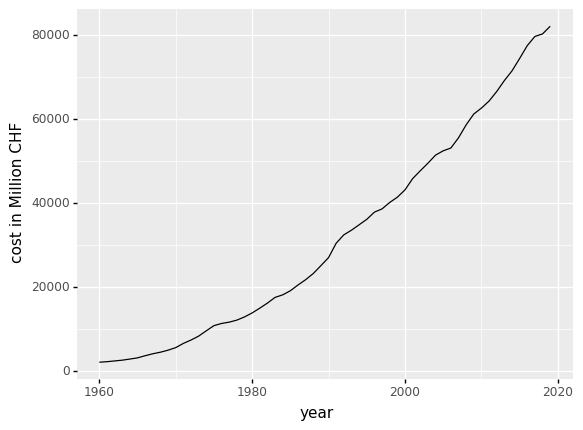

<ggplot: (96979522573)>

In [21]:
scale1 = ggplot(data=df_cost)+geom_line(mapping=aes(x="year", y="cost_M"))+ ylab("cost in Million CHF")
scale1

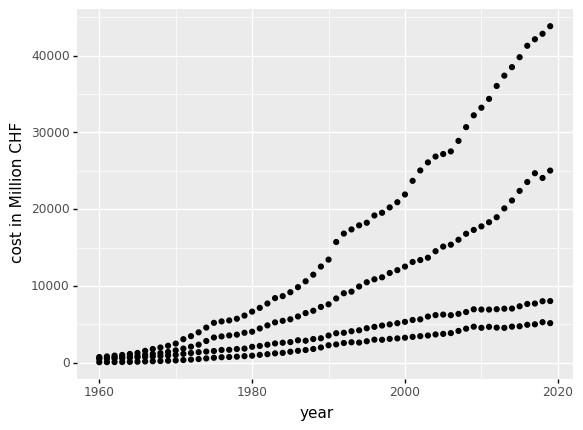

<ggplot: (96979462563)>

In [8]:
aes1=ggplot(data=df_new)+geom_point(mapping=aes(x="year", y="Cost"))+ ylab("cost in Million CHF")
aes1

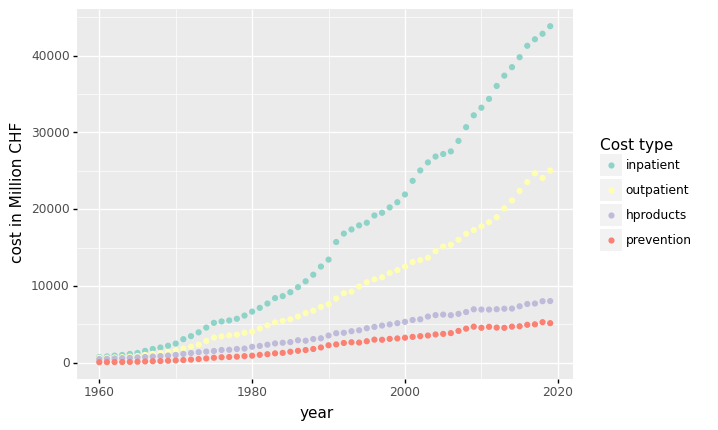

<ggplot: (96979491274)>

In [9]:
aes4 = ggplot(data=df_new)+geom_point(mapping=aes(x="year", y="Cost", color="Cost type"))+ scale_colour_brewer(type="qual", palette="Set3")+ ylab("cost in Million CHF")
aes4

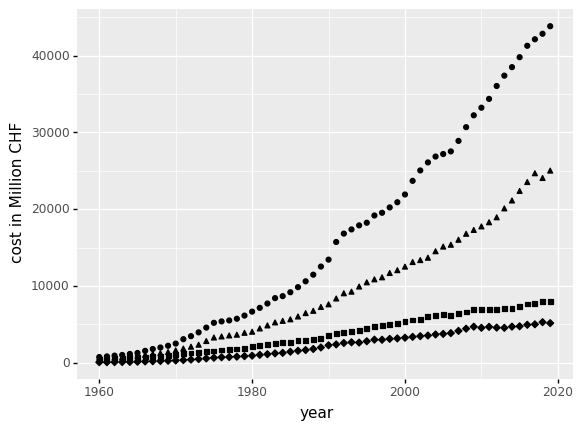

<ggplot: (96979535433)>

In [10]:
aes3 = ggplot(data=df_new)+geom_point(mapping=aes(x="year", y="Cost", shape="Cost type")) + scale_shape_discrete(guide=False)+ ylab("cost in Million CHF")
aes3

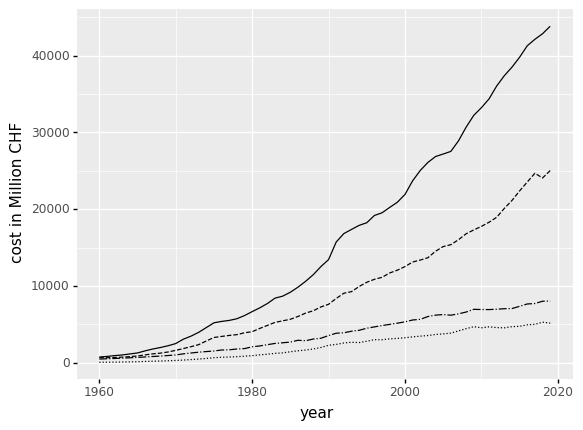

<ggplot: (96979433099)>

In [11]:
aes2 =ggplot(data=df_new)+geom_line(mapping=aes(x="year", y="Cost", linetype="Cost type"))+ scale_linetype_discrete(guide=False)+ ylab("cost in Million CHF")
aes2

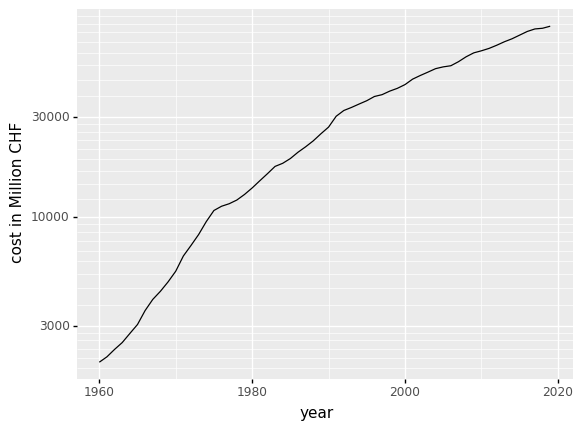

<ggplot: (96979630376)>

In [12]:
scale2 = ggplot(data=df_cost)+gee(mapping=aes(x="year", y="cost_M"))+scale_y_log10()+ ylab("cost in Million CHF")
scale2

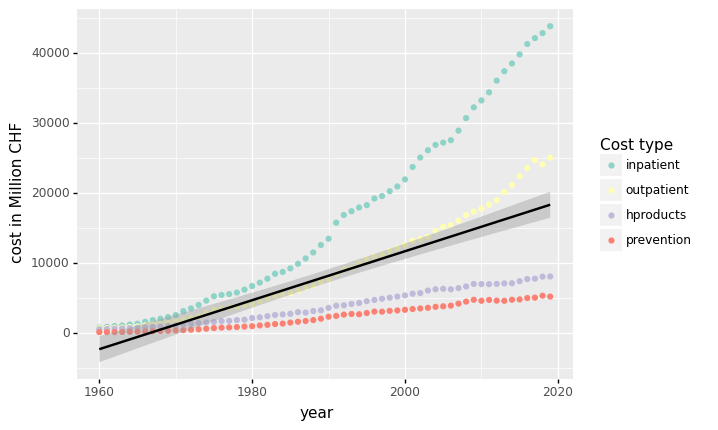

<ggplot: (96979594602)>

In [13]:
obj1 = ggplot(df_new, aes("year", "Cost"))+geom_point(aes(color="Cost type")) + geom_smooth(method="lm")+ scale_colour_brewer(type="qual", palette="Set3")+ ylab("cost in Million CHF")
obj1

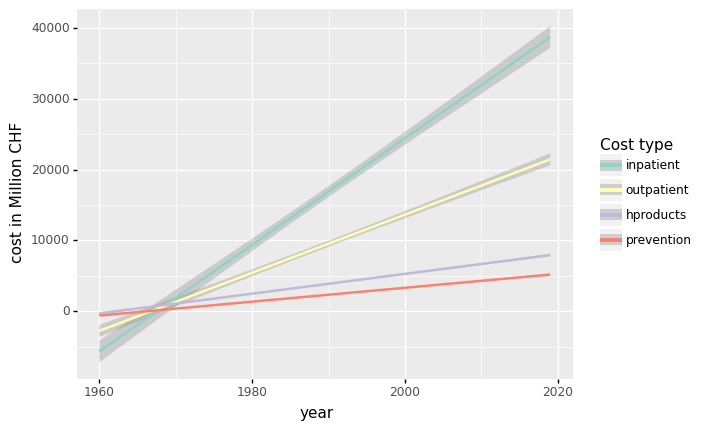

<ggplot: (96979539908)>

In [14]:
obj2=ggplot(df_new)+geom_smooth(aes(x="year", y="Cost",color="Cost type"), method="lm")+ scale_colour_brewer(type="qual", palette="Set3")+ ylab("cost in Million CHF")
obj2

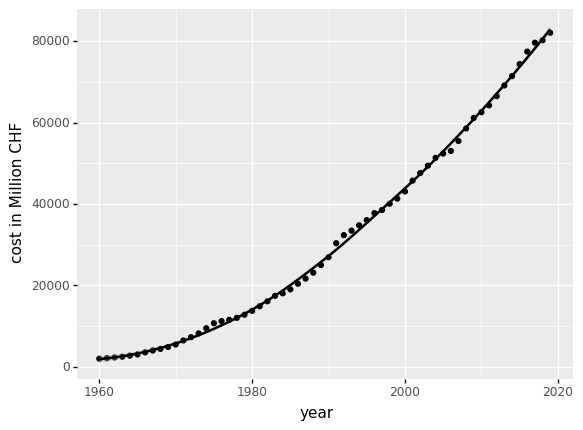

<ggplot: (96981351144)>

In [15]:
ggplot(df_cost, aes("year", "cost_M"))+geom_point() + geom_smooth()+ ylab("cost in Million CHF")

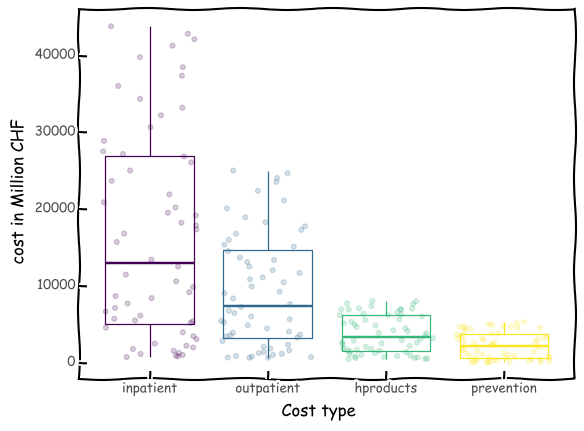

<ggplot: (96979761881)>

In [16]:
stat1 = ggplot(df_new, aes("Cost type", "Cost", color="Cost type")) + geom_boxplot(show_legend={'color': False})+ geom_jitter(alpha=0.2, show_legend={'color': False})+ theme_xkcd()+ ylab("cost in Million CHF")
stat1

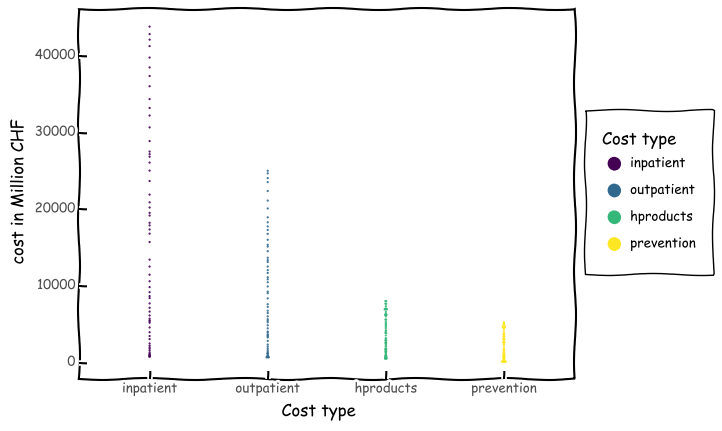

<ggplot: (96981255334)>

In [17]:
stat2 = ggplot(df_new, aes("Cost type", "Cost",color="Cost type", fill="Cost type")) + geom_dotplot(binaxis="y", stackdir="center", binwidth=100, show_legend={'color': False})+ theme_xkcd()+ ylab("cost in Million CHF")
stat2

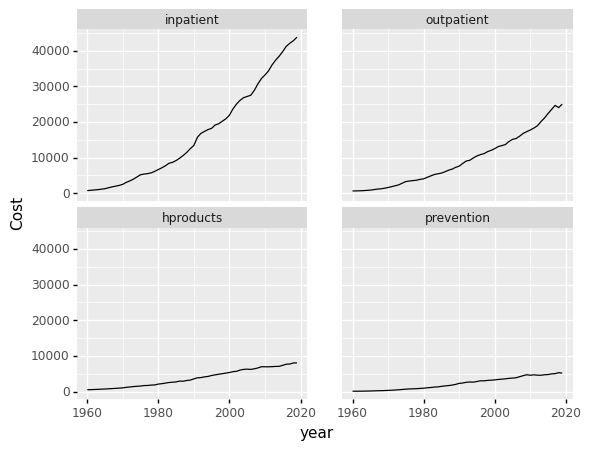

<ggplot: (96979773203)>

In [18]:
f=ggplot(df_new) + geom_line(mapping=aes(x="year", y="Cost")) + facet_wrap("Cost type", nrow=2, scales="fixed")+theme(subplots_adjust={'wspace':0.15})
f

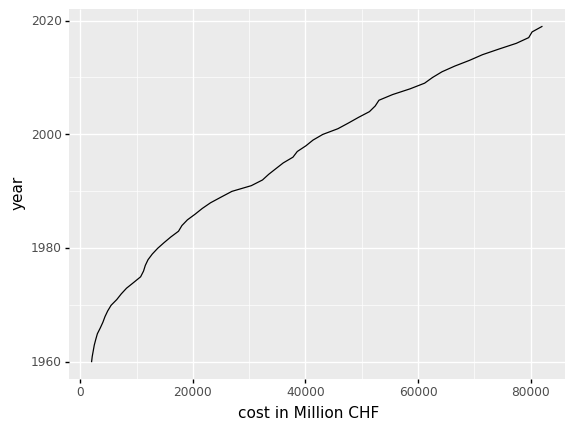

<ggplot: (96979640305)>

In [27]:
coord1 = ggplot(data=df_cost)+geom_line(mapping=aes(x="year", y="cost_M"))+ ylab("cost in Million CHF") + coord_flip()
coord1

In [28]:
aes1.save(filename = 'gog_aes1.png')
aes2.save(filename = 'gog_aes2.png')
aes3.save(filename = 'gog_aes3.png')
aes4.save(filename = 'gog_aes4.png')
scale1.save(filename = 'gog_scale1.png')
scale2.save(filename = 'gog_scale2.png')
obj1.save(filename = 'gog_obj1.png')
obj2.save(filename = 'gog_obj2.png')
stat1.save(filename = 'gog_stat1.png')
stat2.save(filename = 'gog_stat2.png')
f.save(filename = 'gog_facets.png')
coord1.save(filename = 'gog_coord1.png')

C:\Users\danie\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\danie\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: gog_aes1.png
C:\Users\danie\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\danie\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: gog_aes2.png
C:\Users\danie\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\danie\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: gog_aes3.png
C:\Users\danie\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\danie\miniconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: gog_aes4.png
C:\Users\danie\miniconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users